In [1]:
# getting necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mlconfound.simulate import simulate_y_c_yhat, sigmoid, polynomial, sinh_arcsinh


sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# getting the data

w_yc=3.0
w_yyhat=3.0
w_cyhat=3 # H0
n=10000
samp=100


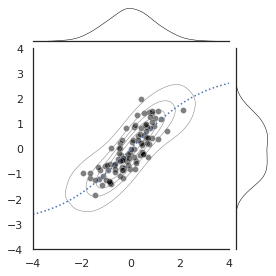

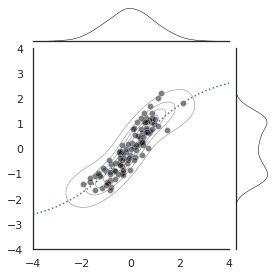

In [2]:
y, c, yhat =simulate_y_c_yhat(w_yc=w_yc,
                              w_yyhat=w_yyhat, w_cyhat=w_cyhat,
                              n=n,
                              random_state=42,
                              delta=1,
                              epsilon=0,
                              nonlin_trf_fun=sigmoid)
with sns.axes_style("white"):
    g=sns.jointplot(x=y,y=c, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":1.5},
                  joint_kws={"colors":"gray", "linewidths":0.5, "bw_adjust":2, "levels":6},
                  xlim = (-4,4), ylim = (-4,4))
    sns.lineplot(x=y*w_yc, y=sigmoid(y)*w_yc, ax=g.ax_joint, linestyle=":")
    sns.scatterplot(x=y[:samp], y=c[:samp], ax=g.ax_joint, color="black", alpha=0.5)
    plt.savefig('../fig/raw/overview_yc.pdf')

    g=sns.jointplot(x=y,y=yhat, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":1.5},
                  joint_kws={"colors":"gray", "linewidths":0.5, "bw_adjust":2, "levels":6},
                  xlim = (-4,4), ylim = (-4,4))
    sns.lineplot(x=y*w_yc, y=sigmoid(y)*w_yc, ax=g.ax_joint, linestyle=":")
    sns.scatterplot(x=y[:samp], y=yhat[:samp], ax=g.ax_joint, color="black", alpha=0.5)
    plt.savefig('../fig/raw/overview_yyhat.pdf')

In [3]:
from mlconfound.stats import _conditional_log_likelihood_gaussian_gam_cont_cont, _generate_X_CPT_MC

samp_c = c[:samp]
samp_y = y[:samp]
samp_yhat = yhat[:samp]

loglikmat = _conditional_log_likelihood_gaussian_gam_cont_cont(samp_c, samp_y)

samp_c_pi1 = samp_c[_generate_X_CPT_MC(50, loglikmat, np.arange(samp), random_state=42)]
samp_c_pi2 = samp_c[_generate_X_CPT_MC(50, loglikmat, np.arange(samp), random_state=43)]
samp_c_pi3 = samp_c[_generate_X_CPT_MC(50, loglikmat, np.arange(samp), random_state=44)]



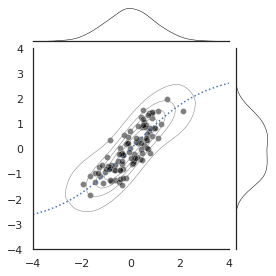

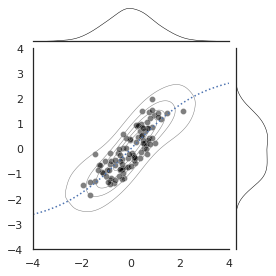

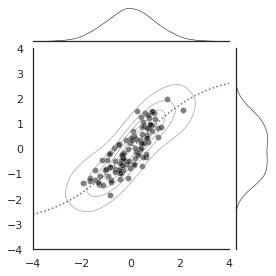

In [4]:
with sns.axes_style("white"):
    g=sns.jointplot(x=y,y=c, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":1.5},
                  joint_kws={"colors":"gray", "linewidths":0.5, "bw_adjust":2, "levels":6},
                  xlim = (-4,4), ylim = (-4,4))
    sns.lineplot(x=y*w_yc, y=sigmoid(y)*w_yc, ax=g.ax_joint, linestyle=":")
    sns.scatterplot(x=samp_y, y=samp_c_pi1, ax=g.ax_joint, color="black", alpha=0.5)
    plt.savefig('../fig/raw/overview_yc_pi1.pdf')

    g=sns.jointplot(x=y,y=c, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":1.5},
                  joint_kws={"colors":"gray", "linewidths":0.5, "bw_adjust":2, "levels":6},
                  xlim = (-4,4), ylim = (-4,4))
    sns.lineplot(x=y*w_yc, y=sigmoid(y)*w_yc, ax=g.ax_joint, linestyle=":")
    sns.scatterplot(x=samp_y, y=samp_c_pi2, ax=g.ax_joint, color="black", alpha=0.5)
    plt.savefig('../fig/raw/overview_yc_pi2.pdf')

    g=sns.jointplot(x=y,y=c, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":1.5},
                  joint_kws={"colors":"gray", "linewidths":0.5, "bw_adjust":2, "levels":6},
                  xlim = (-4,4), ylim = (-4,4))
    sns.lineplot(x=y*w_yc, y=sigmoid(y)*w_yc, ax=g.ax_joint, linestyle=":")
    sns.scatterplot(x=samp_y, y=samp_c_pi3, ax=g.ax_joint, color="black", alpha=0.5)
    plt.savefig('../fig/raw/overview_yc_pi3.pdf')




0.8318321626026464

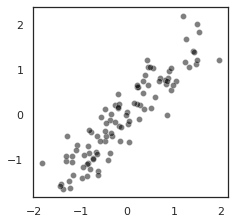

In [35]:
sns.set(rc={"figure.figsize":(3.5, 3.5)})
sns.set_style("white")
sns.scatterplot(x=samp_c, y=samp_yhat, color="black", alpha=0.5)
plt.savefig('../fig/raw/overview_cyhat.pdf')
np.corrcoef(samp_c, samp_yhat)[0,1]**2

0.528902852686382

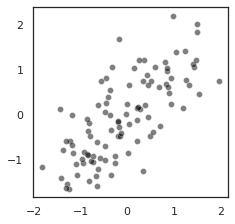

In [36]:
sns.scatterplot(x=samp_c_pi1, y=samp_yhat, color="black", alpha=0.5)
plt.savefig('../fig/raw/overview_cyhat_pi1.pdf')
np.corrcoef(samp_c_pi1, samp_yhat)[0,1]**2

0.5500560164043264

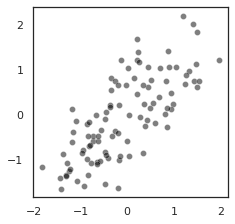

In [37]:
sns.scatterplot(x=samp_c_pi2, y=samp_yhat, color="black", alpha=0.5)
plt.savefig('../fig/raw/overview_cyhat_pi2.pdf')
np.corrcoef(samp_c_pi2, samp_yhat)[0,1]**2

0.5623628320596741

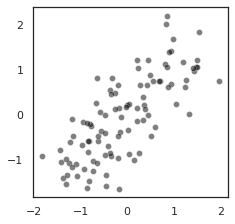

In [38]:
sns.scatterplot(x=samp_c_pi3, y=samp_yhat, color="black", alpha=0.5)
plt.savefig('../fig/raw/overview_cyhat_pi3.pdf')
np.corrcoef(samp_c_pi3, samp_yhat)[0,1]**2


Permuting: 100%|██████████| 1000/1000 [00:00<00:00, 1874.42it/s]


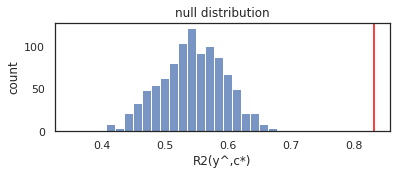

In [30]:
from mlconfound.stats import partial_confound_test
from mlconfound.plot import plot_null_dist

sns.set(rc={"figure.figsize":(6, 2)})
sns.set_style("white")

plot_null_dist(partial_confound_test(samp_y, samp_yhat, samp_c, return_null_dist=True))
plt.savefig('../fig/raw/overview_null_dist.pdf')